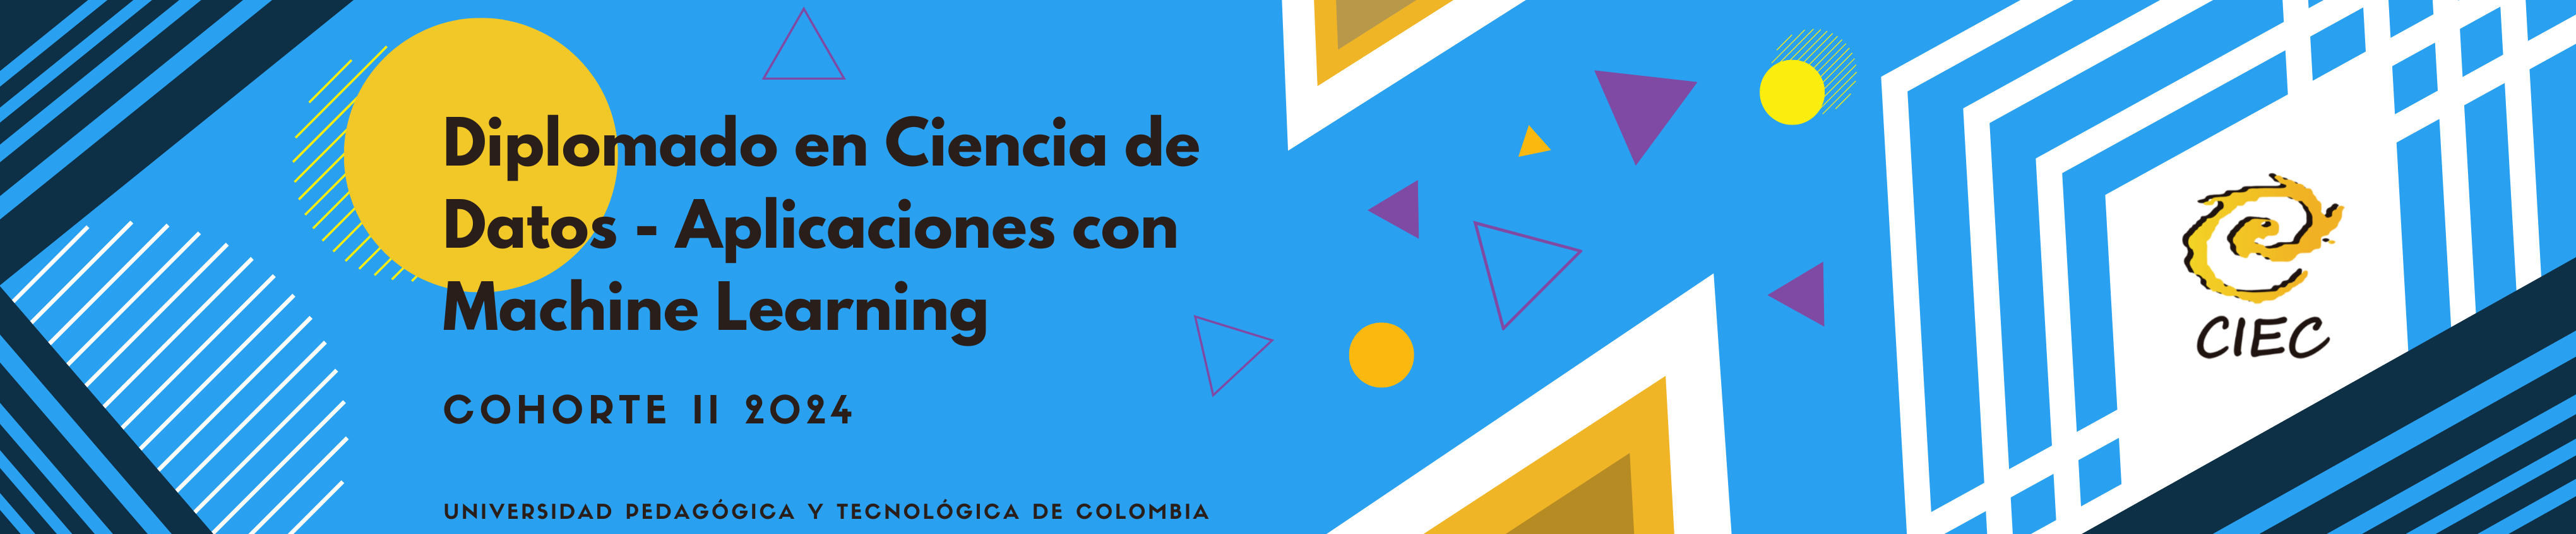

<h1 style="color: #FECB05; text-align: center;"> Autoencoders </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Estructura de un Autoencoder</span>](#dim-curse)
- [<span style="color: #005C99;">Aplicaciones de los Autoencoders</span>](#dim-curse)
- [<span style="color: #005C99;">Identificando variables de estado en sistemas dinámicos</span>](#dim-curse)
- [<span style="color: #005C99;">Hugging Face</span>](#dim-curse)

---

<h2 style="color: #007ACC;"> Introducción </h2>

Los **autoencoders** son un tipo especial de red neuronal utilizada principalmente para tareas de **aprendizaje no supervisado**. Estas redes están diseñadas para aprender representaciones compactas (o codificaciones) de los datos, manteniendo la capacidad de reconstruir los datos originales a partir de estas representaciones. Los autoencoders han encontrado aplicaciones en compresión de datos, reducción de dimensionalidad, detección de anomalías y generación de datos sintéticos.

<img src = "../img/vanilla-AE.webp">

Fuente: [Introduction to Autoencoders](https://pyimagesearch.com/2023/07/10/introduction-to-autoencoders/)

<h2 style="color: #007ACC;"> Estructura de un Autoencoder </h2>

Un autoencoder consiste en dos partes principales:

1. **Codificador (Encoder):**  
   El codificador toma la entrada $\mathbf{x}$ y la mapea a un espacio latente de menor dimensión $\mathbf{z}$, que representa una versión comprimida de los datos originales. Matemáticamente:

   $$\mathbf{z} = f_{\text{encoder}}(\mathbf{x}; \theta_e)$$

   
   Donde $\theta_e$ son los parámetros del codificador.

1. **Decodificador (Decoder):**  
   El decodificador toma la representación latente $\mathbf{z}$ y reconstruye los datos originales $\hat{\mathbf{x}}$:

   $$\hat{\mathbf{x}} = f_{\text{decoder}}(\mathbf{z}; \theta_d)$$

   
   Aquí, $\theta_d$ son los parámetros del decodificador, y $\hat{\mathbf{x}}$ es la reconstrucción.


El objetivo del entrenamiento es minimizar la diferencia entre la entrada original $\mathbf{x}$ y la reconstrucción $\hat{\mathbf{x}}$, utilizando una función de pérdida como el error cuadrático medio (MSE):

$$\mathcal{L} = \vert \vert \mathbf{x} - \hat{\mathbf{x}} \vert \vert ^2$$

**Funcionamiento**

1. **Entrada:** Se introduce un dato de entrada $\mathbf{x}$ al autoencoder.
2. **Codificación:** El codificador transforma $\mathbf{x}$ en una representación comprimida $\mathbf{z}$.
3. **Decodificación:** El decodificador toma $\mathbf{z}$ y genera $\hat{\mathbf{x}}$, una aproximación de $\mathbf{x}$.
4. **Reconstrucción:** La calidad de la reconstrucción se evalúa comparando $\mathbf{x}$ y $\hat{\mathbf{x}}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist

In [2]:
# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# Normalizar los datos y aplanarlos
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
x_train = x_train.reshape((x_train.shape[0], -1))  # (60000, 784)
x_test = x_test.reshape((x_test.shape[0], -1))    # (10000, 784)

In [5]:
print("Forma de los datos de entrenamiento:", x_train.shape)
print("Forma de los datos de prueba:", x_test.shape)

Forma de los datos de entrenamiento: (60000, 784)
Forma de los datos de prueba: (10000, 784)


In [6]:
# Dimensión de entrada y espacio latente
input_dim = x_train.shape[1]  # 784 (28x28)
latent_dim = 64  # Espacio latente reducido

# Codificador
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(latent_dim, activation="relu")(encoded)

# Decodificador
decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

# Modelo completo (Autoencoder)
autoencoder = Model(input_img, decoded)

In [7]:
# Compilar el modelo
autoencoder.compile(optimizer="adam", loss="mse")

In [8]:
# Resumen del modelo
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Entrenar el autoencoder
history = autoencoder.fit(
    x_train,
    x_train,  # El objetivo es reconstruir la entrada
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.2
)


Epoch 1/20


2024-11-28 11:29:03.956856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


188/188 [==============================] - 1s 4ms/step - loss: 0.0625 - val_loss: 0.0342
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0266 - val_loss: 0.0215
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0189 - val_loss: 0.0167
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0113
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 8/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 9/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 11/2

In [10]:
# Evaluar la pérdida en el conjunto de prueba
loss = autoencoder.evaluate(x_test, x_test)
print(f"Pérdida de reconstrucción en el conjunto de prueba: {loss}")

313/313 [==============================] - 0s 599us/step - loss: 0.0059
Pérdida de reconstrucción en el conjunto de prueba: 0.00588865065947175


In [11]:
# Generar reconstrucciones en el conjunto de prueba
decoded_imgs = autoencoder.predict(x_test)

# Volver a la forma original (28x28)
x_test = x_test.reshape((-1, 28, 28))
decoded_imgs = decoded_imgs.reshape((-1, 28, 28))

313/313 [==============================] - 0s 563us/step


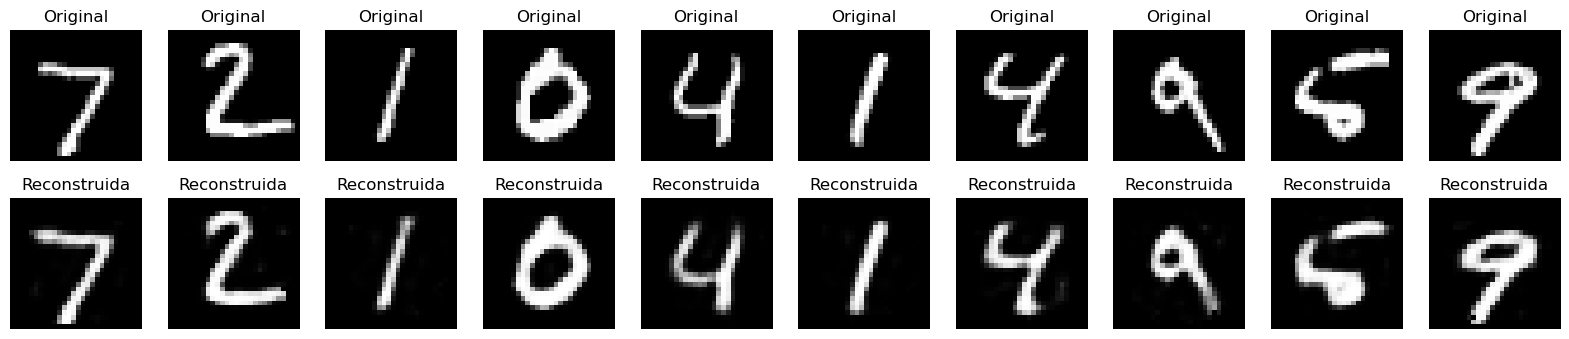

In [12]:
# Mostrar imágenes originales y reconstruidas
n = 10  # Número de imágenes a mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap="gray")
    plt.title("Reconstruida")
    plt.axis("off")

plt.show()

In [13]:
# Crear un modelo que solo incluya el codificador
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)  # Capa latente
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Generar las representaciones latentes del conjunto de prueba
latent_representations = encoder.predict(x_test.reshape((-1, 784)))

print("Forma del espacio latente:", latent_representations.shape)

313/313 [==============================] - 0s 587us/step
Forma del espacio latente: (10000, 64)


In [15]:
from sklearn.manifold import TSNE
import seaborn as sns

In [16]:
# Reducir el espacio latente a 2D con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
latent_2d = tsne.fit_transform(latent_representations)

In [17]:
mnist = mnist.load_data()

In [18]:
target = mnist[1][1]

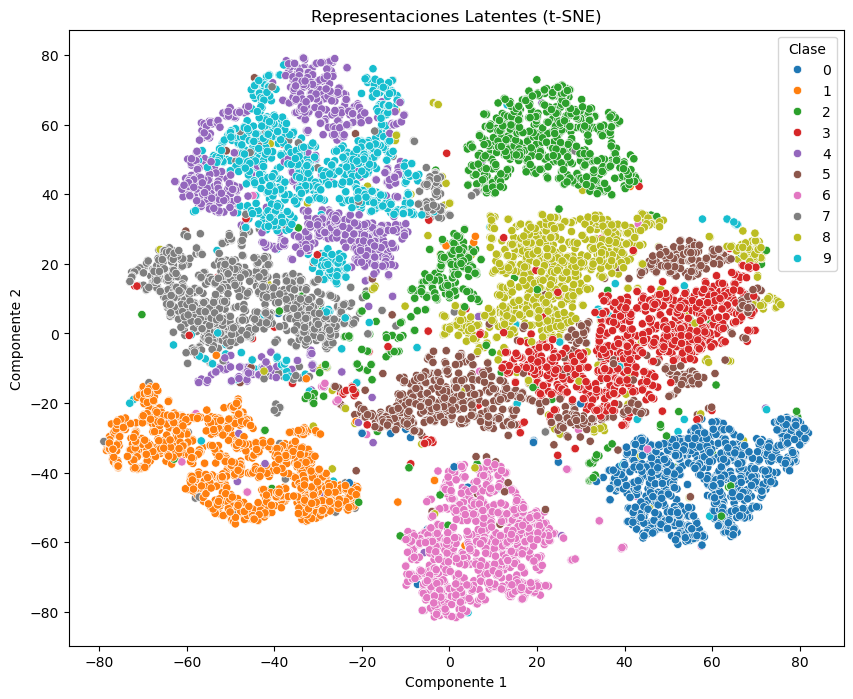

In [19]:
# Visualización de las representaciones latentes
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1], hue=target, palette="tab10", legend="full")
plt.title("Representaciones Latentes (t-SNE)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="Clase")
plt.show()

<h2 style="color: #007ACC;"> Aplicaciones de los Autoencoder </h2>

**Reducción de dimensionalidad:**
Similar a PCA (Análisis de Componentes Principales), pero con una capacidad no lineal. Los autoencoders pueden reducir datos a un espacio latente mientras capturan relaciones complejas.

**Detección de anomalías:**
Los autoencoders entrenados en datos normales tienden a fallar al reconstruir datos anómalos, permitiendo su detección.

**Compresión de datos:**
Los autoencoders pueden comprimir datos, almacenando únicamente la representación latente $𝑧$

**Eliminación de ruido:**
Los denoising autoencoders son capaces de limpiar señales ruidosas en dominios como imágenes, audio y datos biométricos.

**Aprendizaje de características:**
En muchos casos, los autoencoders se utilizan para aprender características útiles que pueden ser aprovechadas en tareas supervisadas.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist

In [21]:
# Cargar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [22]:
# Redimensionar las imágenes (28x28) en vectores (784)
x_train = x_train.reshape((x_train.shape[0], -1))  # (60000, 784)
x_test = x_test.reshape((x_test.shape[0], -1))    # (10000, 784)

In [23]:
print("Forma de las imágenes de entrenamiento:", x_train.shape)
print("Forma de las imágenes de prueba:", x_test.shape)

Forma de las imágenes de entrenamiento: (60000, 784)
Forma de las imágenes de prueba: (10000, 784)


In [24]:
# Añadir ruido gaussiano
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Limitar los valores al rango [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

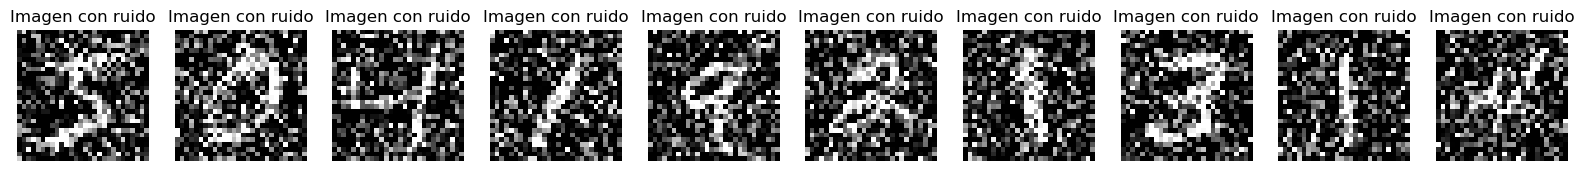

In [25]:
# Visualizar imágenes con ruido
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Imagen con ruido")
    plt.axis("off")

plt.show()

In [26]:
# Dimensiones de entrada y espacio latente
input_dim = x_train.shape[1]  # 784 (28x28)
latent_dim = 64  # Espacio latente reducido

# Codificador
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(latent_dim, activation="relu")(encoded)

# Decodificador
decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

# Modelo completo (Denoising Autoencoder)
autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer="adam", loss="mse")

# Resumen del modelo
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Entrenar el autoencoder
history = autoencoder.fit(
    x_train_noisy,
    x_train,  # Las imágenes limpias son el objetivo
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.0663 - val_loss: 0.0427
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0359 - val_loss: 0.0319
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0295 - val_loss: 0.0277
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0263 - val_loss: 0.0254
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0244 - val_loss: 0.0240
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0219
Epoch 8/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 9/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0205 - val_loss: 0.0206
Epoch 10/20
188/188 [==============================] - 1s 5ms/step - loss: 0.0199 - val_loss: 0.0201

In [28]:
# Generar reconstrucciones a partir de las imágenes con ruido
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 0s 579us/step


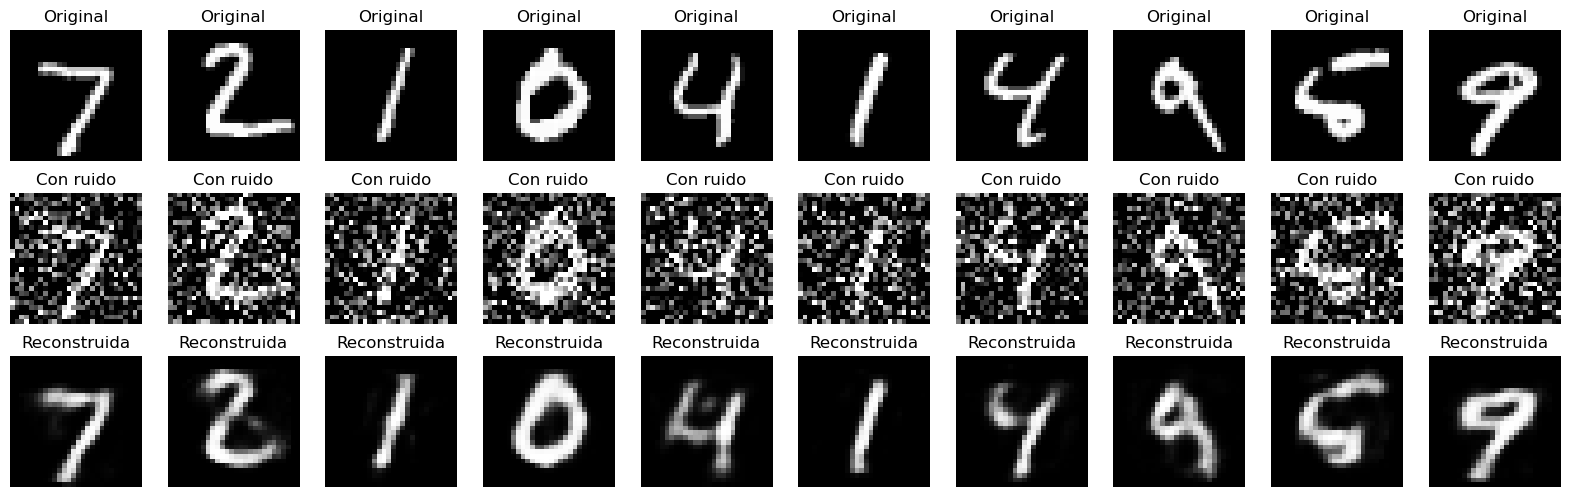

In [29]:
# Mostrar imágenes originales, con ruido y reconstruidas
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Imagen con ruido
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Con ruido")
    plt.axis("off")
    
    # Imagen reconstruida
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstruida")
    plt.axis("off")

plt.show()

<h2 style="color: #007ACC;"> Detección de anomalías </h2>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Generar datos sintéticos
np.random.seed(42)
data = np.random.normal(0, 1, (1000, 2))  # Datos normales
anomalies = np.random.normal(5, 1, (50, 2))  # Datos anómalos

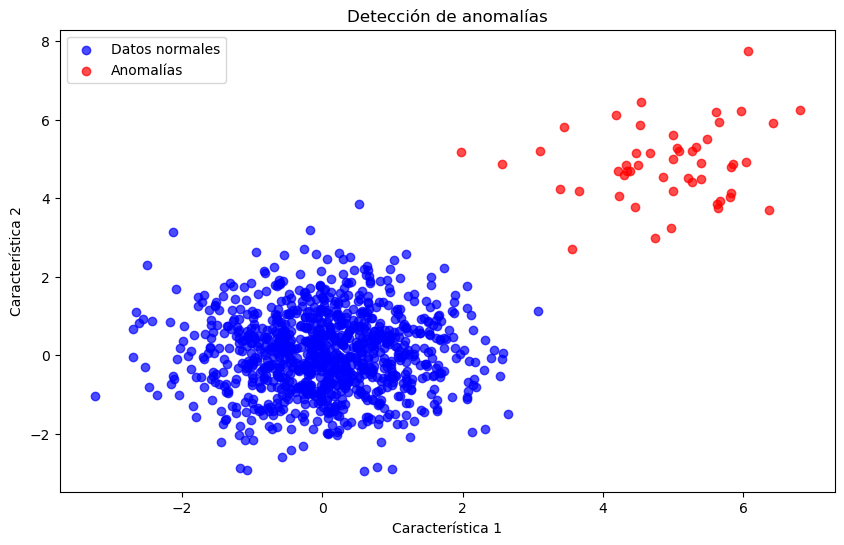

In [32]:
# Gráfico de dispersión para datos normales y anomalías
plt.figure(figsize=(10, 6))

plt.scatter(data[:, 0], data[:, 1], label="Datos normales", alpha=0.7, color="blue")
plt.scatter(anomalies[:, 0], anomalies[:, 1], label="Anomalías", alpha=0.7, color="red")
plt.title("Detección de anomalías")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()

In [33]:
all_data = np.vstack([data, anomalies])

In [34]:
# Normalización de datos
scaler = MinMaxScaler()
all_data = scaler.fit_transform(all_data)

In [35]:
# División de los datos en entrenamiento y prueba
X_train, X_test = train_test_split(all_data, test_size=0.2, random_state=42)

In [36]:
# Arquitectura del Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 1  # Número de neuronas en la capa oculta

# Definición del modelo
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [37]:
# Compilación del modelo
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
# Entrenamiento del Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0551 - val_loss: 0.0511
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0513 - val_loss: 0.0477
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0479 - val_loss: 0.0448
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0425
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0430 - val_loss: 0.0407
Epoch 6/50
21/21 [==============================] - 0s 985us/step - loss: 0.0413 - val_loss: 0.0393
Epoch 7/50
21/21 [==============================] - 0s 866us/step - loss: 0.0399 - val_loss: 0.0380
Epoch 8/50
21/21 [==============================] - 0s 883us/step - loss: 0.0385 - val_loss: 0.0368
Epoch 9/50
21/21 [==============================] - 0s 827us/step - loss: 0.0373 - val_loss: 0.0357
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0361 - val_loss: 0.0345
Epoch 11/50

In [39]:
# Calcular errores de reconstrucción en el conjunto de prueba
reconstructions = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(reconstructions - X_test), axis=1)

# Determinar un umbral para clasificar anomalías
threshold = np.percentile(reconstruction_errors, 95)  # Umbral como el percentil 95

# Clasificar anomalías
anomalies = reconstruction_errors > threshold

7/7 [==============================] - 0s 446us/step


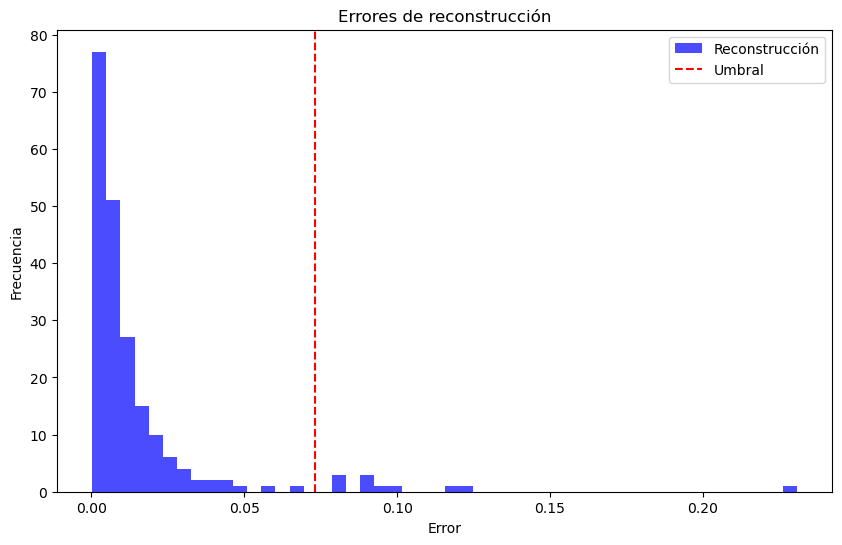

Umbral para detección de anomalías: 0.07320915934553358
Anomalías detectadas: 11 de 210 muestras.


In [40]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, color='blue', alpha=0.7, label="Reconstrucción")
plt.axvline(x=threshold, color='red', linestyle='--', label="Umbral")
plt.title("Errores de reconstrucción")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Mostrar resultados
print(f"Umbral para detección de anomalías: {threshold}")
print(f"Anomalías detectadas: {np.sum(anomalies)} de {len(reconstruction_errors)} muestras.")

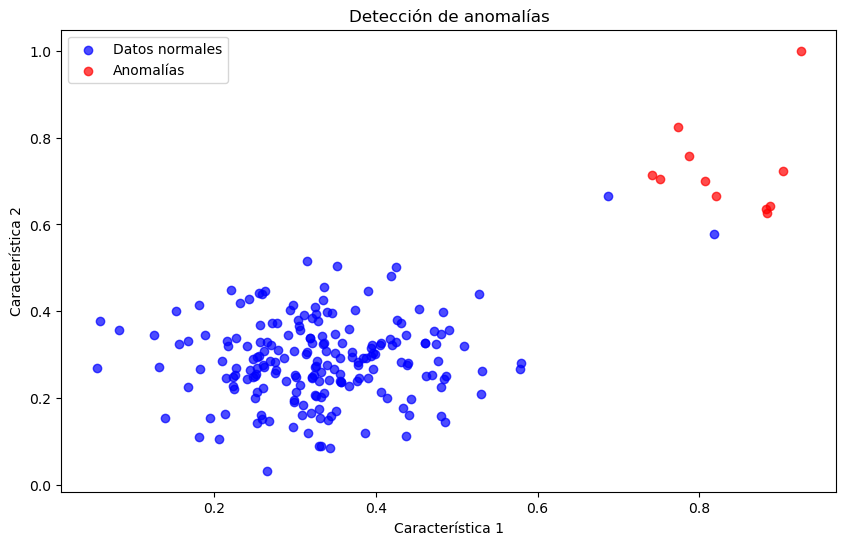

In [41]:
# Gráfico de dispersión para datos normales y anomalías
plt.figure(figsize=(10, 6))
normal_data = X_test[~anomalies]
anomalous_data = X_test[anomalies]

plt.scatter(normal_data[:, 0], normal_data[:, 1], label="Datos normales", alpha=0.7, color="blue")
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], label="Anomalías", alpha=0.7, color="red")
plt.title("Detección de anomalías")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()

<h2 style="color: #007ACC;"> Identificando variables de estado en sistemas dinámicos </h2>

El artículo [Discovering State Variables Hidden in Experimental Data](https://arxiv.org/pdf/2112.10755) propone un enfoque innovador para identificar automáticamente las variables de estado ocultas que rigen la dinámica de sistemas físicos complejos, partiendo exclusivamente de datos experimentales. Tradicionalmente, en sistemas físicos bien estudiados, las variables de estado suelen ser conocidas (como posición, velocidad, etc.). Sin embargo, en sistemas complejos y menos explorados, como flujos turbulentos o reacciones químicas, estas variables no son evidentes y deben descubrirse.

<h3 style="color: #007ACC;"> Motivación </h3>

El estudio parte de una problemática central: ¿cómo identificar las variables relevantes y su número sin conocimiento previo de la física subyacente? Este desafío es crucial en física, biología y otros campos donde el comportamiento observable (como videos o datos de sensores) se deriva de procesos internos ocultos.

<h3 style="color: #007ACC;"> Metodología </h3>

El enfoque presentado en el artículo utiliza redes neuronales para aprender representaciones latentes que capturen el estado dinámico del sistema. Este método:

- Determina el número mínimo de variables de estado necesarias para describir el sistema.
- Identifica cuáles son esas variables, asegurando que sean relevantes y no redundantes.
- Es independiente del dominio físico específico, lo que lo hace aplicable a una amplia variedad de sistemas.

<img src = "../img/pendulum.png">

Fuente: [Can AI discover new physics](https://www.youtube.com/watch?v=XRL56YCfKtA&t=243s)

In [42]:
from IPython.display import HTML

HTML(r'<iframe width="1000" height="500" src="https://www.youtube.com/embed/XRL56YCfKtA" title="Can AI disover new physics?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
